# Prepare the running environment

## Download and unzip dataset

In [ ]:
!pip install wget;

In [ ]:
%%capture
import wget
url = 'https://github.com/qutang/MUSS/releases/download/data/muss_data.tar.gz'
filename = wget.download(url);

In [ ]:
import tarfile
tar = tarfile.open(filename)
tar.extractall()
tar.close()

**Size of the whole unzipped raw dataset** is about 7.3GB

# Reproduce results

In [5]:
# Load libraries to help display results
import os
from IPython.display import display, HTML, IFrame, Image
import pandas as pd
def PDF(url):
    return HTML('<iframe src=%s width=700 height=350></iframe>' % url)

In [6]:
# Set input parameters
from helper.utils import generate_run_folder
input_folder = './muss_data/'
sampling_rate = 80
scheduler = 'processes'
debug = False
output_folder = generate_run_folder(input_folder=input_folder, debug=debug)

## Generate class labels from annotations

The running time using colab's hosted runtime (dual logical cores) is about 4-5 min. If you have a multi-core CPU local workstation, it is recommended to use your local runtime.

In [4]:
%%capture
import prepare_class_set as step1
step1.prepare_class_set(input_folder=input_folder, debug=debug, scheduler=scheduler)

Computation profiling

In [ ]:
HTML(filename=os.path.join(output_folder, 'classset_computation_profiling.html'))

Class labels for the whole dataset. For this project, we will use class labels in column **POSTURE**, and **ACTIVITY**, and **ACTIVITY_GROUP**.

In [8]:
class_data = pd.read_csv(os.path.join(output_folder, 'muss.class.csv'))
class_data.head(5)

START_TIME                STOP_TIME       PID ANNOTATOR  \
0  2015-09-24 14:34:59.200  2015-09-24 14:35:12.000  SPADES_1     diego   
1  2015-09-24 14:35:12.000  2015-09-24 14:35:24.800  SPADES_1     diego   
2  2015-09-24 14:35:24.800  2015-09-24 14:35:37.600  SPADES_1     diego   
3  2015-09-24 14:35:37.600  2015-09-24 14:35:50.400  SPADES_1     diego   
4  2015-09-24 14:35:50.400  2015-09-24 14:36:03.200  SPADES_1     diego   

     ANNOTATION_LABELS                     ACTIVITY     POSTURE  \
0                still                   Transition  Transition   
1                still  Self-selected free standing     Upright   
2  jumping jacks still                   Transition  Transition   
3                still  Self-selected free standing     Upright   
4                still  Self-selected free standing     Upright   

  ACTIVITY_GROUP SEDENTARY_AMBULATION_CYCLING ACTIVITY_ABBR  
0     Transition                   Transition    Transition  
1       Standing                       Others    Free-stand  
2     Transition                   Transition    Transition  
3       Standing                       Others    Free-stand  
4       Standing                       Others    Free-stand

## Generate features

The running time using colab's hosted runtime (dual logical cores) is about **60 min**. If you have a multi-core CPU local workstation, it is recommended to use your local runtime.

In [ ]:
%%capture
import prepare_feature_set as step2
step2.prepare_feature_set(input_folder=input_folder, debug=debug, sampling_rate=sampling_rate, scheduler=scheduler)

Computation profiling

In [22]:
HTML(filename=os.path.join(output_folder, 'feature_computation_profiling.html'))

Feature set for the whole dataset.

In [7]:
feature_data = pd.read_csv(os.path.join(output_folder,'muss.feature.csv'))
feature_data.head(5)

START_TIME                STOP_TIME       PID            SID  \
0  2015-09-24 14:22:36.800  2015-09-24 14:22:49.600  SPADES_1  TAS1E23150066   
1  2015-09-24 14:22:49.600  2015-09-24 14:23:02.400  SPADES_1  TAS1E23150066   
2  2015-09-24 14:23:02.400  2015-09-24 14:23:15.200  SPADES_1  TAS1E23150066   
3  2015-09-24 14:23:15.200  2015-09-24 14:23:28.000  SPADES_1  TAS1E23150066   
4  2015-09-24 14:23:28.000  2015-09-24 14:23:40.800  SPADES_1  TAS1E23150066   

  SENSOR_PLACEMENT    MEAN_0     STD_0  POSITIVE_AMPLITUDE_0  \
0               DT  1.034478  0.235774              2.554919   
1               DT  1.012970  0.060512              1.250213   
2               DT  1.034410  0.070257              1.921847   
3               DT  1.037474  0.136930              1.843704   
4               DT  1.023160  0.148373              2.421302   

   DOMINANT_FREQUENCY_0  DOMINANT_FREQUENCY_POWER_RATIO_0       ...        \
0              5.669291                          0.090836       ...         
1              2.421875                          0.046715       ...         
2              3.671875                          0.026959       ...         
3              8.515625                          0.026822       ...         
4              0.859375                          0.067992       ...         

   AMPLITUDE_RANGE_0  ACTIVE_PERC_0  ACTIVATION_COUNT_0  ACTIVATION_STD_0  \
0           1.879437            1.0            0.007874               0.0   
1           0.589367            1.0            0.000977               0.0   
2           1.079340            1.0            0.000977               0.0   
3           1.285506            1.0            0.000977               0.0   
4           2.023223            1.0            0.000977               0.0   

   MEDIAN_ANGLES_0  MEDIAN_ANGLES_1  MEDIAN_ANGLES_2  RANGE_ANGLES_0  \
0         2.367509         1.194094         0.950508        0.362731   
1         2.115303         1.471175         0.611920        0.478785   
2         2.261964         2.020969         0.910902        0.290690   
3         2.050299         1.747820         0.619375        0.297996   
4         1.118777         1.498008         0.935997        0.753246   

   RANGE_ANGLES_1  RANGE_ANGLES_2  
0        0.362739        0.168710  
1        0.764211        0.697747  
2        0.252926        0.454073  
3        0.519880        0.203617  
4        0.914276        2.139925  

[5 rows x 21 columns]

## Combine feature and label data into validation datasets

A validation dataset means a dataset that includes training data from a specific sensor combination (e.g., dominant wrist + dominant ankle) and using a specific feature set (in our case, feature set could be "motion", "orientation", and "motion + orientation").

The running time using colab's hosted runtime (dual logical cores) is about **25-30 min**. If you have a multi-core CPU local workstation, it is recommended to use your local runtime.

In [ ]:
%%capture
import prepare_validation_set as step3
step3.main(input_folder=input_folder, debug=debug, scheduler=scheduler)

Computation profiling

In [23]:
HTML(filename=os.path.join(output_folder,'dataset_computation_profiling.html'))

A sample validation set for DW + DA, using motion + orientation features.

In [9]:
sample_dataset = pd.read_csv(os.path.join(output_folder,'datasets/DW_DA.MO.dataset.csv'))
sample_dataset.head(5)

START_TIME                STOP_TIME       PID  \
0  2015-09-24 14:35:12.000  2015-09-24 14:35:24.800  SPADES_1   
1  2015-09-24 14:35:37.600  2015-09-24 14:35:50.400  SPADES_1   
2  2015-09-24 14:35:50.400  2015-09-24 14:36:03.200  SPADES_1   
3  2015-09-24 14:36:41.600  2015-09-24 14:36:54.400  SPADES_1   
4  2015-09-24 14:36:54.400  2015-09-24 14:37:07.200  SPADES_1   

                           SID SENSOR_PLACEMENT FEATURE_TYPE  MEAN_0_DW  \
0  TAS1E23150108_TAS1E23150126            DW_DA           MO   0.984328   
1  TAS1E23150108_TAS1E23150126            DW_DA           MO   1.079258   
2  TAS1E23150108_TAS1E23150126            DW_DA           MO   0.991187   
3  TAS1E23150108_TAS1E23150126            DW_DA           MO   1.296703   
4  TAS1E23150108_TAS1E23150126            DW_DA           MO   0.984177   

   STD_0_DW  POSITIVE_AMPLITUDE_0_DW  DOMINANT_FREQUENCY_0_DW      ...        \
0  0.015452                 1.062904                 0.000000      ...         
1  0.572509                 8.007174                 0.312500      ...         
2  0.048498                 1.260324                 1.406250      ...         
3  0.877372                 6.514731                 0.078125      ...         
4  0.005269                 1.008732                 0.000000      ...         

   RANGE_ANGLES_0_DA  RANGE_ANGLES_1_DA  RANGE_ANGLES_2_DA  ANNOTATOR  \
0           0.004388           0.004100           0.003073      diego   
1           0.019971           0.042044           0.008411      diego   
2           0.063756           0.154975           0.048934      diego   
3           0.047203           0.161013           0.045108      diego   
4           0.006548           0.034330           0.005966      diego   

   ANNOTATION_LABELS                     ACTIVITY  POSTURE  ACTIVITY_GROUP  \
0              still  Self-selected free standing  Upright        Standing   
1              still  Self-selected free standing  Upright        Standing   
2              still  Self-selected free standing  Upright        Standing   
3              still  Self-selected free standing  Upright        Standing   
4              still  Self-selected free standing  Upright        Standing   

   SEDENTARY_AMBULATION_CYCLING  ACTIVITY_ABBR  
0                        Others     Free-stand  
1                        Others     Free-stand  
2                        Others     Free-stand  
3                        Others     Free-stand  
4                        Others     Free-stand  

[5 rows x 45 columns]

## Run validation experiments



In [ ]:
%%capture
import run_validation_experiments as step4
step4.main(input_folder=input_folder, debug=debug, scheduler=scheduler)

Computation profiling

In [24]:
HTML(filename=os.path.join(output_folder,'validation_experiment_profiling.html'))

A sample prediction set (result) of a validation experiment for DW + DA, using motion + orientation features on both posture and activity recognition.

In [14]:
sample_dataset = pd.read_csv(os.path.join(output_folder,'predictions/DW_DA.MO.prediction.csv'))
sample_dataset.head(5)

START_TIME                STOP_TIME       PID  \
0  2015-09-24 14:35:12.000  2015-09-24 14:35:24.800  SPADES_1   
1  2015-09-24 14:35:37.600  2015-09-24 14:35:50.400  SPADES_1   
2  2015-09-24 14:35:50.400  2015-09-24 14:36:03.200  SPADES_1   
3  2015-09-24 14:36:41.600  2015-09-24 14:36:54.400  SPADES_1   
4  2015-09-24 14:36:54.400  2015-09-24 14:37:07.200  SPADES_1   

                           SID SENSOR_PLACEMENT FEATURE_TYPE  MEAN_0_DW  \
0  TAS1E23150108_TAS1E23150126            DW_DA           MO   0.984328   
1  TAS1E23150108_TAS1E23150126            DW_DA           MO   1.079258   
2  TAS1E23150108_TAS1E23150126            DW_DA           MO   0.991187   
3  TAS1E23150108_TAS1E23150126            DW_DA           MO   1.296703   
4  TAS1E23150108_TAS1E23150126            DW_DA           MO   0.984177   

   STD_0_DW  POSITIVE_AMPLITUDE_0_DW  DOMINANT_FREQUENCY_0_DW  \
0  0.015452                 1.062904                 0.000000   
1  0.572509                 8.007174                 0.312500   
2  0.048498                 1.260324                 1.406250   
3  0.877372                 6.514731                 0.078125   
4  0.005269                 1.008732                 0.000000   

              ...               RANGE_ANGLES_2_DA  ANNOTATOR  \
0             ...                        0.003073      diego   
1             ...                        0.008411      diego   
2             ...                        0.048934      diego   
3             ...                        0.045108      diego   
4             ...                        0.005966      diego   

   ANNOTATION_LABELS                     ACTIVITY  POSTURE  ACTIVITY_GROUP  \
0              still  Self-selected free standing  Upright        Standing   
1              still  Self-selected free standing  Upright        Standing   
2              still  Self-selected free standing  Upright        Standing   
3              still  Self-selected free standing  Upright        Standing   
4              still  Self-selected free standing  Upright        Standing   

   SEDENTARY_AMBULATION_CYCLING  ACTIVITY_ABBR  POSTURE_PREDICTION  \
0                        Others     Free-stand             Sitting   
1                        Others     Free-stand             Upright   
2                        Others     Free-stand             Upright   
3                        Others     Free-stand             Upright   
4                        Others     Free-stand             Sitting   

           ACTIVITY_PREDICTION  
0    Reclining and using phone  
1  Self-selected free standing  
2  Self-selected free standing  
3  Self-selected free standing  
4  Self-selected free standing  

[5 rows x 47 columns]

## Compute metrics

In [ ]:
import compute_metrics as step5
step5.main(input_folder=input_data, debug=debug, scheduler=scheduler)

The summary metrics file

In [15]:
metrics = pd.read_csv(os.path.join(output_folder,'muss.metrics.csv'))
metrics.head(5)

SENSOR_PLACEMENT  NUM_OF_SENSORS FEATURE_TYPE  POSTURE_AVERAGE  \
0               DA               1            M         0.550809   
1               DH               1            M         0.647011   
2               DT               1            M         0.615841   
3               DW               1            M         0.555806   
4              NDA               1            M         0.494151   

   LYING_POSTURE  SITTING_POSTURE  UPRIGHT_POSTURE  ACTIVITY_AVERAGE  \
0       0.279251         0.528525         0.844652          0.346106   
1       0.422295         0.663228         0.855509          0.348099   
2       0.348632         0.561414         0.937476          0.365625   
3       0.341778         0.555455         0.770186          0.321426   
4       0.257913         0.386874         0.837665          0.321187   

   ACTIVITY_GROUP_AVERAGE  ACTIVITY_IN_GROUP_AVERAGE  LYING_GROUP  \
0                0.752414                   0.323800     0.286885   
1                0.755021                   0.357087     0.482143   
2                0.818349                   0.329835     0.413734   
3                0.519827                   0.466230     0.268041   
4                0.718590                   0.307855     0.122117   

   WALKING_GROUP  WALKING_IN_GROUP  STANDING_GROUP  STANDING_IN_GROUP  \
0       0.974398          0.467873        0.650319           0.280348   
1       0.948712          0.472531        0.662116           0.393520   
2       0.971429          0.444939        0.868268           0.380312   
3       0.773435          0.432157        0.582945           0.636548   
4       0.962907          0.454477        0.674510           0.321007   

   SITTING_GROUP  SITTING_IN_GROUP  BIKING_GROUP  RUNNING_GROUP  
0       0.656923          0.223181      0.970852       0.975104  
1       0.618905          0.205209      0.841121       0.977131  
2       0.710321          0.164253      0.981982       0.964361  
3       0.475616          0.329984      0.048583       0.970339  
4       0.622066          0.148081      0.952809       0.977131

# Figures and tables

In [1]:
import publication_figures

## Figure 1

In [2]:
%%capture
g = publication_figures.figure_1(input_folder=input_data, debug=debug)

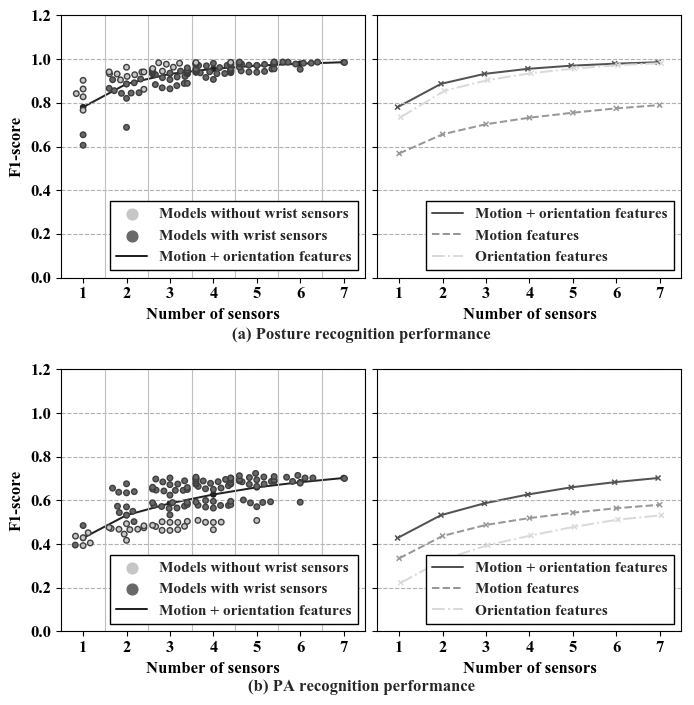

In [3]:
g

## Figure 2

In [4]:
%%capture
g = publication_figures.figure_2(input_folder=input_folder, debug=debug)

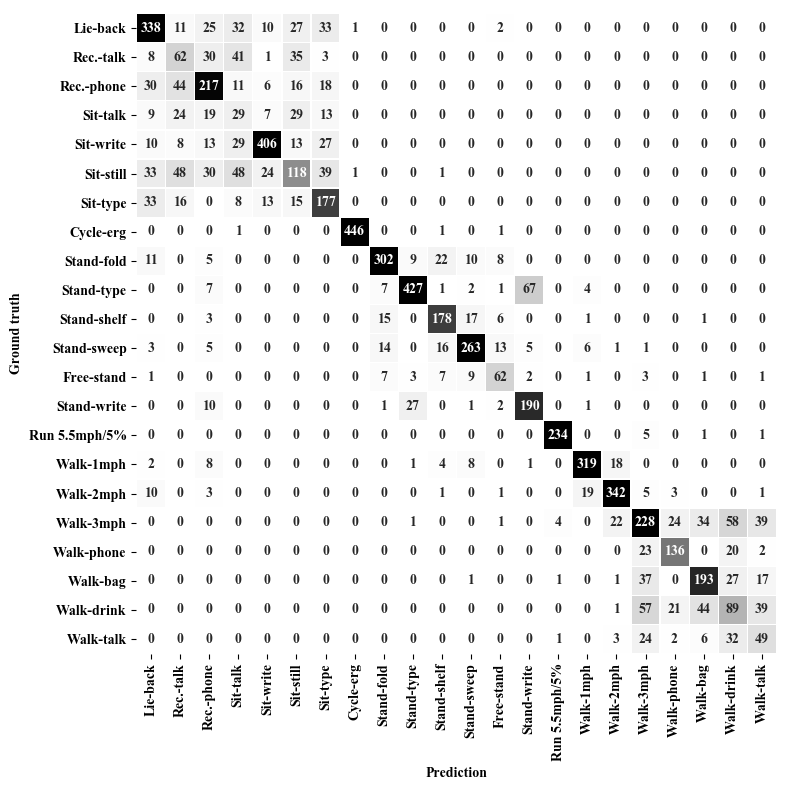

In [5]:
g

In [14]:
dataset_stats, activity_samples, ag_samples = publication_figures.dataset_summary(input_folder=input_folder, debug=debug)

## Dataset Stats

In [15]:
dataset_stats

0
mean_age               23.439024
std_age                 2.683736
male                   27.000000
female                 15.000000
mean_bmi               24.240100
std_bmi                 4.239823
offset_percentage       0.547619
mean_offset            -2.190476
std_offset              3.437513
misplace_percentage     0.272109
total_samples        6674.000000
total_activities       22.000000
upright_samples      3984.000000
sitting_samples      2211.000000
lying_samples         479.000000

## Table 1

In [16]:
activity_samples

ACTIVITY  DURATION(MIN)
Unknown                                                 6438    1373.440000
Transition                                              3254     694.186667
Standing and typing on a keyboard                        516     110.080000
Sitting and writing                                      506     107.946667
Lying on the back                                        479     102.186667
Stationary cycle ergometry                               449      95.786667
Level treadmill walking at 3-3.5 mph                     411      87.680000
Level treadmill walking at 2 mph with arms on desk       385      82.133333
Standing and folding towels                              367      78.293333
Level treadmill walking at 1 mph with arms on desk       361      77.013333
Sitting still                                            342      72.960000
Reclining and using phone                                342      72.960000
Standing and sweeping                                    327      69.760000
Level treadmill walking at 3-3.5 mph and carryi...       277      59.093333
Sitting and typing on a keyboard                         262      55.893333
Level treadmill walking at 3-3.5 mph and carryi...       251      53.546667
Treadmill running at 5.5 mph & 5% grade                  241      51.413333
Standing and writing at a table                          232      49.493333
Standing loading/unloading shelf                         221      47.146667
Level treadmill walking at 3-3.5 mph while hold...       181      38.613333
Reclining and talking                                    180      38.400000
Sitting and talking                                      130      27.733333
Level treadmill walking at 3-3.5 mph while talking       117      24.960000
Self-selected free standing                               97      20.693333

In [17]:
ag_samples

ACTIVITY_GROUP  DURATION(MIN)
Unknown               6438    1373.440000
Transition            3254     694.186667
Walking               1983     423.040000
Sitting               1762     375.893333
Standing              1760     375.466667
Lying                  479     102.186667
Biking                 449      95.786667
Running                241      51.413333

## Table 3

In [8]:
publication_figures.table_3(input_folder=input_folder, debug=debug)

# of sensors Sensor placements      Average        Lying      Sitting  \
2              3        DA, DH, DT         0.98         0.98         0.98   
1              2           NDH, DT         0.96         0.93         0.97   
0              1               NDH          0.9         0.89         0.87   
2              3        DW, DA, DT         0.96         0.92         0.97   
1              2           DW, NDH         0.91         0.91         0.88   
0              1                DW         0.65         0.52         0.67   
16             3           A, H, T  0.98 ± 0.01  0.96 ± 0.02  0.98 ± 0.01   
17             3              A, T   0.96 ± nan   0.89 ± nan   0.99 ± nan   
20             3              H, T   0.95 ± nan    0.9 ± nan   0.97 ± nan   
21             3          H, T (W)   0.95 ± 0.0  0.88 ± 0.01   0.96 ± 0.0   
10             2              H, T  0.95 ± 0.02  0.89 ± 0.06  0.96 ± 0.01   
18             3          A, T (W)  0.95 ± 0.01  0.88 ± 0.03   0.97 ± 0.0   
14             3              A, H   0.95 ± 0.0  0.97 ± 0.01  0.91 ± 0.01   
7              2              A, T  0.94 ± 0.01  0.86 ± 0.03  0.97 ± 0.01   
15             3          A, H (W)  0.93 ± 0.01  0.95 ± 0.02    0.9 ± 0.0   
6              2              A, H  0.93 ± 0.01  0.95 ± 0.02   0.9 ± 0.01   
19             3             H (W)  0.91 ± 0.01   0.9 ± 0.02  0.88 ± 0.01   
8              2                 H   0.91 ± nan   0.91 ± nan   0.87 ± nan   
9              2             H (W)   0.9 ± 0.01  0.88 ± 0.02  0.87 ± 0.01   
1              1                 H  0.88 ± 0.03  0.85 ± 0.05  0.85 ± 0.03   
13             3             A (W)  0.88 ± 0.01  0.88 ± 0.03  0.84 ± 0.01   
22             3             T (W)   0.87 ± nan    0.7 ± nan   0.92 ± nan   
4              2                 A   0.86 ± nan   0.88 ± nan   0.82 ± nan   
5              2             A (W)  0.85 ± 0.01  0.83 ± 0.01  0.82 ± 0.01   
11             2             T (W)  0.84 ± 0.02  0.63 ± 0.06   0.9 ± 0.01   
0              1                 A  0.84 ± 0.01  0.82 ± 0.03  0.81 ± 0.01   
2              1                 T   0.77 ± nan   0.48 ± nan   0.83 ± nan   
12             2        W only (W)   0.69 ± nan   0.58 ± nan   0.69 ± nan   
3              1        W only (W)  0.63 ± 0.03  0.48 ± 0.06  0.64 ± 0.03   

        Upright  
2          0.99  
1          0.99  
0          0.94  
2          0.99  
1          0.94  
0          0.77  
16   0.99 ± 0.0  
17   0.99 ± nan  
20   0.99 ± nan  
21   0.99 ± 0.0  
10   0.99 ± 0.0  
18   0.99 ± 0.0  
14   0.95 ± 0.0  
7    0.99 ± 0.0  
15   0.95 ± 0.0  
6   0.95 ± 0.01  
19  0.94 ± 0.01  
8    0.94 ± nan  
9    0.94 ± 0.0  
1    0.94 ± 0.0  
13  0.91 ± 0.01  
22   0.99 ± nan  
4    0.89 ± nan  
5    0.9 ± 0.02  
11   0.99 ± 0.0  
0   0.88 ± 0.01  
2    0.99 ± nan  
12    0.8 ± nan  
3   0.77 ± 0.01

## Table 4

In [9]:
publication_figures.table_4(input_folder=input_folder, debug=debug)

# of sensors Sensor placements      Average Between activity groups  \
2              3        DW, DA, DT          0.7                    0.96   
1              2            DW, DT         0.68                    0.92   
0              1                DW         0.48                    0.66   
2              3        DW, DA, DT          0.7                    0.96   
1              2            DW, DT         0.68                    0.92   
0              1                DW         0.48                    0.66   
19             3          DW, H, T  0.69 ± 0.01              0.97 ± 0.0   
14             3          DW, A, T  0.69 ± 0.01              0.96 ± 0.0   
6              2             DW, T   0.68 ± nan              0.92 ± nan   
21             3         Both W, T   0.67 ± nan              0.92 ± nan   
12             3          DW, A, H  0.66 ± 0.01             0.94 ± 0.01   
16             3         Both W, H  0.65 ± 0.01              0.9 ± 0.01   
4              2             DW, H  0.65 ± 0.01             0.91 ± 0.01   
9              3         Both W, A   0.65 ± 0.0               0.9 ± 0.0   
17             3             DW, H   0.64 ± nan              0.92 ± nan   
2              2             DW, A   0.64 ± 0.0             0.89 ± 0.01   
10             3             DW, A   0.62 ± nan               0.9 ± nan   
20             3         NDW, H, T   0.59 ± 0.0              0.96 ± 0.0   
15             3         NDW, A, T  0.59 ± 0.01              0.96 ± 0.0   
7              2            NDW, T   0.57 ± nan              0.89 ± nan   
13             3         NDW, A, H  0.57 ± 0.01              0.94 ± 0.0   
18             3            NDW, H   0.56 ± nan              0.92 ± nan   
5              2            NDW, H  0.56 ± 0.02             0.91 ± 0.01   
3              2            NDW, A  0.54 ± 0.01              0.9 ± 0.01   
11             3            NDW, A   0.53 ± nan              0.91 ± nan   
8              2    Both W, W only    0.5 ± nan               0.7 ± nan   
0              1        DW, W only   0.48 ± nan              0.66 ± nan   
1              1       NDW, W only    0.4 ± nan              0.67 ± nan   
2              3           A, H, T  0.48 ± 0.02             0.96 ± 0.01   
1              2           A, H, T  0.47 ± 0.02             0.94 ± 0.02   
0              1           A, H, T  0.42 ± 0.02             0.88 ± 0.02   

   Within activity groups  
2                    0.68  
1                    0.67  
0                    0.65  
2                    0.68  
1                    0.67  
0                    0.65  
19             0.67 ± 0.0  
14            0.67 ± 0.01  
6              0.67 ± nan  
21             0.66 ± nan  
12            0.66 ± 0.01  
16            0.68 ± 0.01  
4              0.66 ± 0.0  
9              0.68 ± 0.0  
17             0.65 ± nan  
2             0.68 ± 0.01  
10             0.65 ± nan  
20             0.56 ± 0.0  
15            0.55 ± 0.01  
7              0.56 ± nan  
13            0.56 ± 0.01  
18             0.55 ± nan  
5             0.57 ± 0.01  
3              0.55 ± 0.0  
11             0.54 ± nan  
8              0.64 ± nan  
0              0.65 ± nan  
1              0.53 ± nan  
2             0.43 ± 0.01  
1             0.41 ± 0.01  
0             0.39 ± 0.02

## Supplementary Table 1

In [10]:
publication_figures.supplementary_table_1(input_folder=input_folder, debug=debug)

# of sensors Sensor placements   Average     Lying   Sitting   Upright
119             3        DA, DH, DT  0.983526  0.975661  0.983240  0.991675
141             3       NDA, DH, DT  0.981443  0.970650  0.981883  0.991796
143             3      NDA, NDH, DT  0.976981  0.958159  0.980989  0.991794
124             3       DA, NDH, DT  0.963198  0.925773  0.972147  0.991673
57              2           NDH, DT  0.962930  0.929773  0.968630  0.990387
127             3        DW, DA, DT  0.960179  0.916409  0.973094  0.991034
122             3       DA, NDA, DT  0.956954  0.892678  0.986890  0.991296
125             3       DH, NDH, DT  0.952801  0.900794  0.965814  0.991796
135             3       DW, NDH, DT  0.949727  0.894684  0.963464  0.991032
142             3      NDA, DH, NDH  0.949016  0.972632  0.918202  0.956215
153             3      NDW, NDH, DT  0.947894  0.888442  0.965098  0.990142
133             3       DW, NDA, DT  0.946078  0.881288  0.966419  0.990527
121             3       DA, NDA, DH  0.945702  0.981972  0.906481  0.948653
151             3      NDW, NDA, DT  0.945291  0.872798  0.973684  0.989391
123             3      DA, NDA, NDH  0.945116  0.961257  0.917448  0.956643
130             3        DW, DH, DT  0.942815  0.875642  0.961132  0.991671
120             3       DA, DH, NDH  0.942716  0.973712  0.906146  0.948289
43              2            DA, DT  0.941698  0.873326  0.961504  0.990264
54              2           NDA, DH  0.941423  0.959835  0.910274  0.954161
56              2          NDA, NDH  0.941132  0.950311  0.915247  0.957839
145             3       NDW, DA, DT  0.939964  0.854634  0.975488  0.989769
148             3       NDW, DH, DT  0.939777  0.870902  0.957772  0.990657
144             3       NDW, DA, DH  0.938197  0.971728  0.898032  0.944830
150             3      NDW, NDA, DH  0.936359  0.960825  0.899865  0.948389
126             3        DW, DA, DH  0.934475  0.966597  0.893703  0.943124
152             3     NDW, NDA, NDH  0.933936  0.946708  0.903664  0.951437
55              2           NDA, DT  0.933206  0.837656  0.972090  0.989873
132             3       DW, NDA, DH  0.932812  0.947585  0.900787  0.950063
147             3      NDW, DA, NDH  0.932413  0.945641  0.902286  0.949311
42              2            DA, DH  0.932105  0.976017  0.884497  0.935801
..            ...               ...       ...       ...       ...       ...
129             3       DW, DA, NDH  0.920742  0.908537  0.900245  0.953444
131             3       DW, DH, NDH  0.918432  0.912563  0.892287  0.950445
149             3      NDW, DH, NDH  0.915335  0.908163  0.888939  0.948901
52              2           DW, NDH  0.909156  0.905051  0.878897  0.943520
140             3      DW, NDW, NDH  0.906488  0.902439  0.874800  0.942223
62              2          NDW, NDH  0.905893  0.893145  0.879600  0.944933
47              2           DH, NDH  0.905223  0.907093  0.869466  0.939109
12              1               NDH  0.903201  0.892250  0.873421  0.943933
49              2            DW, DH  0.891938  0.875000  0.862903  0.937912
137             3       DW, NDW, DH  0.889432  0.872651  0.860568  0.935075
146             3      NDW, DA, NDA  0.888759  0.910010  0.841760  0.914506
59              2           NDW, DH  0.886081  0.857711  0.861490  0.939040
128             3       DW, DA, NDA  0.883685  0.904167  0.838834  0.908055
139             3      DW, NDW, NDA  0.878877  0.866534  0.847100  0.922998
138             3       DW, NDW, DT  0.868883  0.696310  0.919561  0.990777
61              2          NDW, NDA  0.866542  0.831892  0.845095  0.922639
136             3       DW, NDW, DA  0.864347  0.852525  0.831588  0.908927
8               1                DH  0.863334  0.816578  0.836050  0.937374
44              2           DA, NDA  0.862119  0.876630  0.820959  0.888769
50              2            DW, DT  0.855809  0.669078  0.907707  0.990642
51              2           DW, NDA  0.846403  0.8138

## Supplementary Table 2

In [11]:
publication_figures.supplementary_table_2(input_folder=input_folder, debug=debug)

# of sensors Sensor placements   Average  Between activity groups  \
127             3        DW, DA, DT  0.702689                 0.959797   
135             3       DW, NDH, DT  0.697881                 0.968796   
130             3        DW, DH, DT  0.689729                 0.963203   
133             3       DW, NDA, DT  0.684738                 0.956818   
50              2            DW, DT  0.676156                 0.922685   
126             3        DW, DA, DH  0.674973                 0.945078   
138             3       DW, NDW, DT  0.672182                 0.922625   
140             3      DW, NDW, NDH  0.660286                 0.905814   
129             3       DW, DA, NDH  0.659081                 0.943620   
52              2           DW, NDH  0.656145                 0.920041   
132             3       DW, NDA, DH  0.652059                 0.933000   
134             3      DW, NDA, NDH  0.649876                 0.942299   
137             3       DW, NDW, DH  0.647240                 0.896969   
136             3       DW, NDW, DA  0.646133                 0.898232   
139             3      DW, NDW, NDA  0.646039                 0.896604   
131             3       DW, DH, NDH  0.643205                 0.922589   
49              2            DW, DH  0.640179                 0.905285   
48              2            DW, DA  0.637609                 0.882147   
51              2           DW, NDA  0.634727                 0.895061   
128             3       DW, DA, NDA  0.624275                 0.903600   
153             3      NDW, NDH, DT  0.590277                 0.959431   
148             3       NDW, DH, DT  0.590028                 0.953580   
151             3      NDW, NDA, DT  0.589115                 0.957948   
145             3       NDW, DA, DT  0.581327                 0.955888   
147             3      NDW, DA, NDH  0.577576                 0.943185   
152             3     NDW, NDA, NDH  0.574033                 0.945198   
62              2          NDW, NDH  0.573388                 0.913549   
150             3      NDW, NDA, DH  0.572002                 0.939603   
60              2           NDW, DT  0.570436                 0.894125   
144             3       NDW, DA, DH  0.565384                 0.942679   
..            ...               ...       ...                      ...   
146             3      NDW, DA, NDA  0.533737                 0.908117   
58              2           NDW, DA  0.532477                 0.888262   
124             3       DA, NDH, DT  0.504200                 0.967118   
53              2           DW, NDW  0.502788                 0.702806   
119             3        DA, DH, DT  0.502313                 0.972062   
141             3       NDA, DH, DT  0.499391                 0.975150   
143             3      NDA, NDH, DT  0.499364                 0.973577   
57              2           NDH, DT  0.493350                 0.972510   
125             3       DH, NDH, DT  0.486183                 0.968532   
10              1                DW  0.484974                 0.662855   
46              2            DH, DT  0.483723                 0.945561   
122             3       DA, NDA, DT  0.481392                 0.954804   
123             3      DA, NDA, NDH  0.480479                 0.947813   
43              2            DA, DT  0.475978                 0.958746   
42              2            DA, DH  0.474673                 0.938680   
55              2           NDA, DT  0.471723                 0.947891   
54              2           NDA, DH  0.468255                 0.933623   
56              2          NDA, NDH  0.467971                 0.944571   
45              2           DA, NDH  0.466450                 0.940385   
120             3       DA, DH, NDH  0.466329                 0.950153   
142             3      NDA, DH, NDH  0.463102                 0.947409   
121             3       DA, NDA, DH  0.462704                 0.941926   
12       